## Problem 1: Perceptrons and Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

(a)

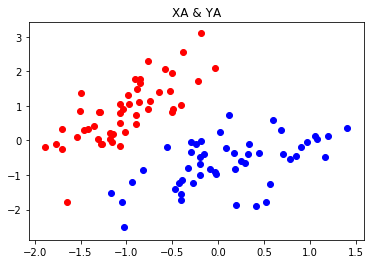

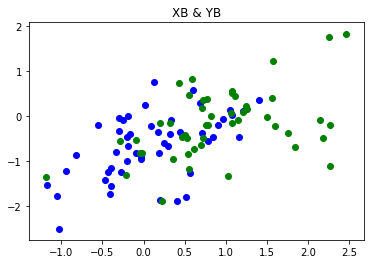

In [2]:
plt.scatter(XA[YA<1,0], XA[YA<1,1], c='red')
plt.scatter(XA[YA>0,0], XA[YA>0,1], c='blue')
plt.title('XA & YA')
plt.show()


plt.scatter(XB[YB<2,0], XB[YB<2,1], c='blue')
plt.scatter(XB[YB>1,0], XB[YB>1,1], c='green')


plt.title('XB & YB')
plt.show()

Hence Set A is linearly separable and the other is not.

(b)

For Set A:


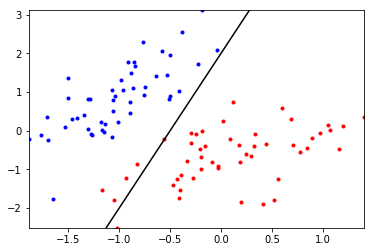


For Set B:


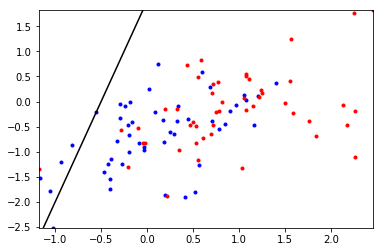

In [4]:
print('For Set A:')
learnerA = logisticClassify2(); 
learnerA.classes = np.unique(YA) 
wtsA = np.array([0.5,1,-0.25]); 
learnerA.theta = wtsA; 
learnerA.plotBoundary(XA, YA);
plt.show()

print('')
print('For Set B:')
learnerB = logisticClassify2(); # create "blank" learner
learnerB.classes = np.unique(YB) # define class labels using YA or YB
wtsB = np.array([0.5,1,-0.25]); # TODO: fill in values
learnerB.theta = wtsB; # set the learner's parameters
learnerB.plotBoundary(XB, YB);
plt.show()

(c)

In [5]:
YAhat = learnerA.predict(XA);
print('Error rate on set A:', learnerA.err(XA, YA));
YBhat = learnerB.predict(XB);
print('Error rate on set B:', learnerB.err(XB, YB));

Error rate on set A: 0.050505050505050504
Error rate on set B: 0.46464646464646464


(d)

For Set A:


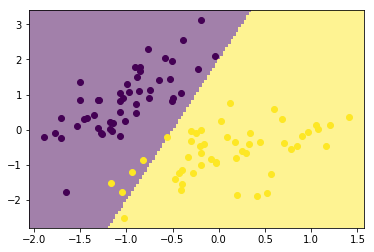

 
For Set B:


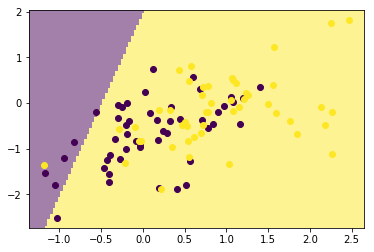

In [6]:
print('For Set A:')
# print(np.array(YA).shape)
ml.plotClassify2D(learnerA, XA ,YA)
plt.show()

print(' ')
print('For Set B:')
ml.plotClassify2D(learnerB, XB, YB)
plt.show()

(e) Gradient of NLL loss function:

sig = 1 / (1 + exp(xi.dot(theta)))

if yi == 1:

    dJi(theta) = -(1-sig) * xi;
    
elif yi == 0:

    dJi(theta) = -sig * xi;

(f) Complete train()

See train() in logisticClassify2.py 

(g)

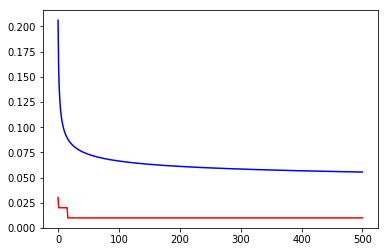

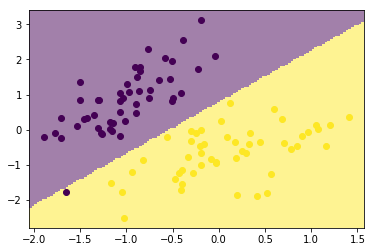

Error rate of set A after training:  0.010101010101010102



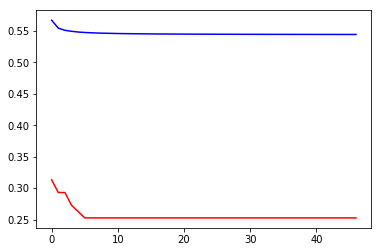

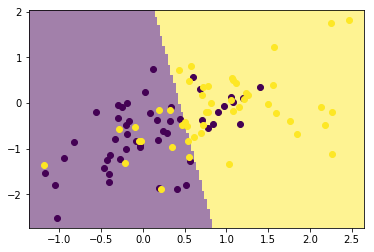

Error rate of set B after training:  0.25252525252525254


In [7]:
plt.figure()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA, YA, initStep=1e-1, stopTol=1e-5, stopEpochs=500); 
plt.show()
ml.plotClassify2D(learnerA,XA,YA)
plt.show()
print("Error rate of set A after training: ",learnerA.err(XA,YA))

print('')
plt.figure()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB, YB, initStep=1e-1, stopTol=1e-5, stopEpochs=500); 
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
plt.show()
print("Error rate of set B after training: ",learnerB.err(XB,YB))

(h) modify train() re-running

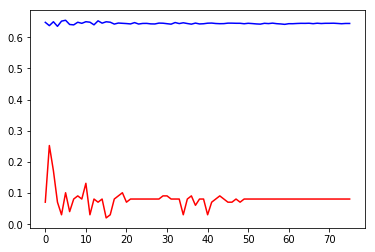

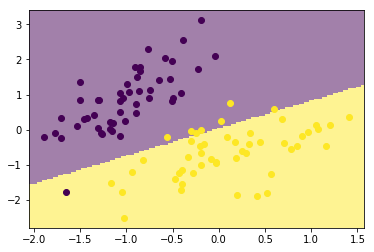

Error rate of set A after training:  0.08080808080808081



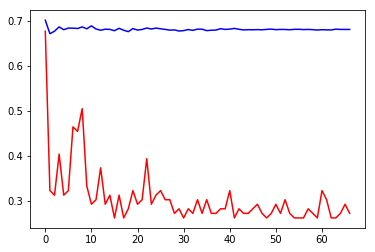

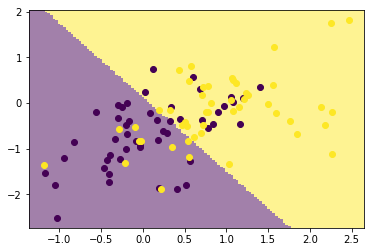

Error rate of set B after training:  0.2727272727272727


In [8]:
plt.figure()
learnerA.theta = np.array([0.,0.,0.]);
learnerA.train(XA, YA, initStep=1e-1, 
               stopTol=1e-5, stopEpochs=100, regularization=True, alpha=2); 
plt.show()
ml.plotClassify2D(learnerA,XA,YA)
plt.show()
print("Error rate of set A after training: ",learnerA.err(XA,YA))

print('')
plt.figure()
learnerB.theta = np.array([0.,0.,0.]);
learnerB.train(XB, YB, initStep=1e-1, 
               stopTol=1e-5, stopEpochs=100, regularization=True, alpha=2); 
plt.show()
ml.plotClassify2D(learnerB,XB,YB)
plt.show()
print("Error rate of set B after training: ",learnerB.err(XB,YB))

When alpha = 2, the boundary has a noticeable difference.

As we can see, the error rate increases if L2 regularization term is improted.

## Problem 2: Shattering and VC Dimension

(a) 

The learner has 2 parameters, and VC dimension is 2.

It can shatter (a) and (b).

But it can not shatter (c) or (d). 

e.g. label point(4,8) with -1, and points(2,2),(6,4) with +1

(b)

The learner has 3 parameters, and VC dimension is 2. 

The decision boundary is a circle, with center(a,b) and radius sqrt(-c).

Since the points within the circle will be predicted as -1, it can shatter (a) and (b) but not (c) or (d).

e.g. label points(2,2),(4,8) with -1 (within the circle), and point(6,4) with +1 (the circle should also contain (4,8), hence this situation is impossible.) 

(c) 

The learner has 2 independent parameters, and VC dimension is 2.

The decision boundary is a line.

Since the line must pass through (0,0), it can shatter (a) and (b) but not (c) or (d). 

e.g. label points(2,2),(6,4) with -1, and point(6,4) with +1. 

(d) 

The learner has 4 independent parameters, and VC dimension >= 4.

The decision boundary is a pair of parallel lines. 

The area within the lines is -1, and the region ouside the lines is +1.

Since the slope and gap of the lines can be adjusted, it can shatter (a), (b), (c) and (d). (For (d), since all points are not on the same line, it can be shattered by this learner.) 

## Code of logisticClassify2.py :

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml


# Fix the required "not implemented" functions for the homework ("TODO")

################################################################################
## LOGISTIC REGRESSION BINARY CLASSIFIER #######################################
################################################################################


class logisticClassify2(ml.classifier):
    """A binary (2-class) logistic regression classifier

    Attributes:
        classes : a list of the possible class labels
        theta   : linear parameters of the classifier 
    """

    def __init__(self, *args, **kwargs):
        """
        Constructor for logisticClassify2 object.  

        Parameters: Same as "train" function; calls "train" if available

        Properties:
           classes : list of identifiers for each class
           theta   : linear coefficients of the classifier; numpy array 
        """
        self.classes = [0,1]              # (default to 0/1; replace during training)
        self.theta = np.array([])         # placeholder value before training

        if len(args) or len(kwargs):      # if we were given optional arguments,
            self.train(*args,**kwargs)    #  just pass them through to "train"


## METHODS ################################################################

    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        x2b = -1*(self.theta[0]+self.theta[1]*x1b)/self.theta[2];    
        
        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0];                                             
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); 
        plt.axis(ax); 
        plt.draw();

    def predictSoft(self, X):
        """ Return the probability of each class under logistic regression """
        raise NotImplementedError
        ## You do not need to implement this function.
        ## If you *want* to, it should return an Mx2 numpy array "P", with 
        ## P[:,1] = probability of class 1 = sigma( theta*X )
        ## P[:,0] = 1 - P[:,1] = probability of class 0 
        return P

    def predict(self, X):
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Yhat = [];
        R = self.theta[0] + X.dot(self.theta[1:]);
        for r in R:
            if r > 0:
                Yhat.append(self.classes[1]) ;            
            else:
                Yhat.append(self.classes[0]);       
        return np.array(Yhat);


    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, 
              plot=None, regularization=False, alpha=2):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X))   # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[]; 
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = XX[i].dot(self.theta);     # TODO: compute linear response r(x)
                if ri > 0:
                    sigi = 1 / (1 + np.exp(-ri))
                else:
                    sigi = np.exp(ri) / (1 + np.exp(ri))
                if YY[i]:
                    gradi = -(1-sigi) * XX[i,:];     # TODO: compute gradient of NLL loss
                else:
                    gradi = sigi * XX[i,:];
                if regularization:
                    gradi += 2*alpha*self.theta;
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate 

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            Sig = [];
            for x in XX:
                r = x.dot(self.theta);
                if r > 0:
                    Sig.append(1 / (1 + np.exp(-r)));
                else:
                    Sig.append(np.exp(r) / (1 + np.exp(r)));
            Sig = np.array(Sig);                   
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jsum = 0;
            counter = 0;
            for s in Sig:
                if (abs(1-s) < 1e-6):
                    Jsum += YY[int(counter)]*np.log(s);
                elif (abs(s) < 1e-6):
                    Jsum += (1-YY[int(counter)])*np.log(1-s);
                else:
                    Jsum += (YY[int(counter)]*np.log(s)+(1-YY[int(counter)])*np.log(1-s));
                counter += 1;
            Jsur = -Jsum / len(YY);
            Jnll.append( Jsur ) # TODO evaluate the current NLL loss
#             if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            # plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jsur[-1], ' / ', J01[-1]  
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            # or if Jnll not changing between epochs ( < stopTol )
            done = (epoch > stopEpochs) or (epoch>1 and abs(Jnll[-1]-Jnll[-2])<stopTol);   
        plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
################################################################################
################################################################################
################################################################################

